In [2]:
import sys

In [3]:
print (sys.version)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [4]:
import pandas as pd

In [5]:
# datafile = 'data/cosmic-array.log.20180217'

In [225]:
datafile = 'data/cosmic-array.log.combined'

In [226]:
data = pd.read_csv(open(datafile),
                   sep='\s+',
                   header=None,
                   names=['datetime','channel'],
                   dtype={'datetime': str}
                   )

In [227]:
data.head()

,datetime,channel
0,1516084564.897229,1
1,1516084600.713800,2
2,1516084615.300136,1
3,1516084617.992265,0
4,1516084673.840925,0


In [228]:
data.describe()

,channel
count,164382.000000
mean,0.918166
std,0.800461
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [229]:
pd.to_datetime(1490195805, unit='s')

Timestamp('2017-03-22 15:16:45')

In [230]:
pd.to_datetime(int("1515142000"),unit="s")

Timestamp('2018-01-05 08:46:40')

In [231]:
pd.to_datetime(float("1515142000.12345"),unit="s")

Timestamp('2018-01-05 08:46:40.123450')

In [232]:
data.head(1)

,datetime,channel
0,1516084564.897229,1


In [233]:
data.tail(1)

,datetime,channel
164381,1516084500.385583,1


In [234]:
binsize=60*60*2

In [259]:
binsizetext='2 hours'

In [235]:
databin = data.datetime.apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [236]:
databincounts = databin.value_counts()

In [237]:
databinDF = pd.DataFrame(databincounts)

In [238]:
databinDF.columns = ["total"]

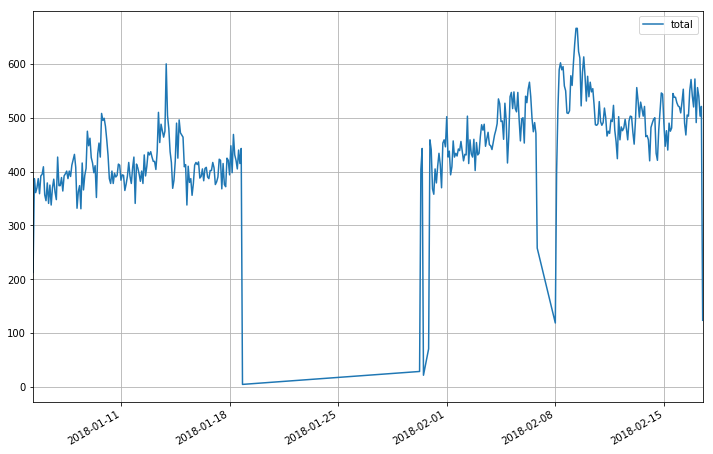

In [239]:
databinDF.plot( grid=True,figsize=(12,8))

In [240]:
databin0 = data.datetime[(data.channel == 0)].apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [241]:
databin0counts = databin0.value_counts()

In [242]:
databin0DF = pd.DataFrame(databin0counts)

In [243]:
databin0DF.columns = ["channel 0"]

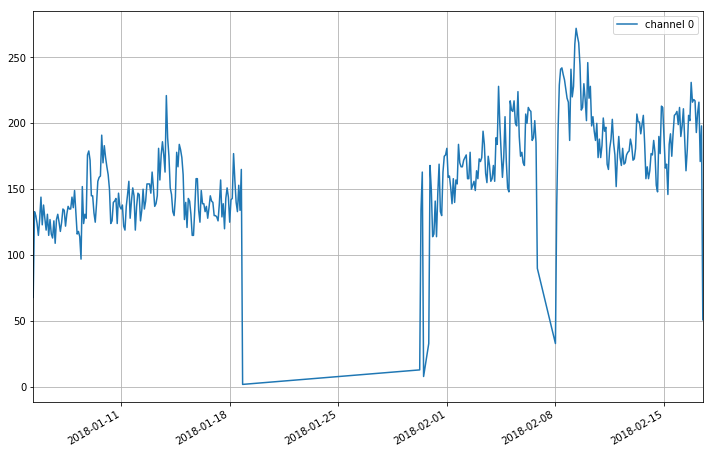

In [244]:
databin0DF.plot( grid=True,figsize=(12,8))

In [245]:
databin1 = data.datetime[(data.channel == 1)].apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [246]:
databin1counts=databin1.value_counts()

In [247]:
databin1DF = pd.DataFrame(databin1counts)

In [248]:
databin1DF.columns = ["channel 1"]

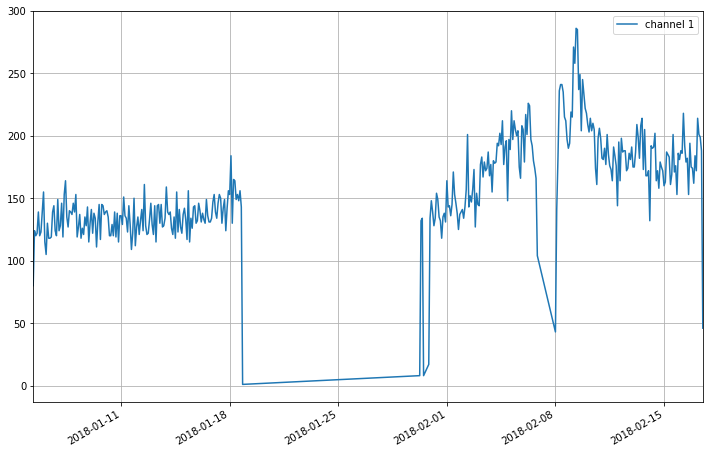

In [249]:
databin1DF.plot( grid=True,figsize=(12,8))

In [250]:
databin2 = data.datetime[(data.channel == 2)].apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [251]:
databin2counts = databin2.value_counts()

In [252]:
databin2DF = pd.DataFrame(databin2counts)

In [253]:
databin2DF.columns = ["channel 2"]

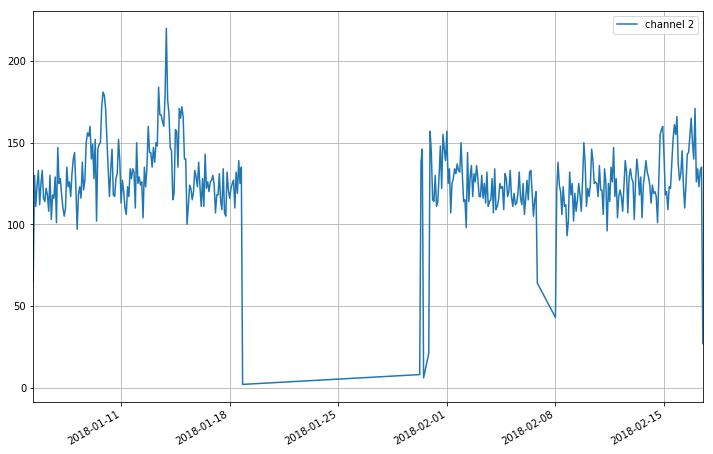

In [254]:
databin2DF.plot( grid=True,figsize=(12,8))

In [255]:
databin2DF.head(2)

,channel 2
2018-01-13 22:00:00,220
2018-01-13 10:00:00,184


In [256]:
datacombined=pd.concat([databinDF,databin0DF,databin1DF,databin2DF], axis=1)

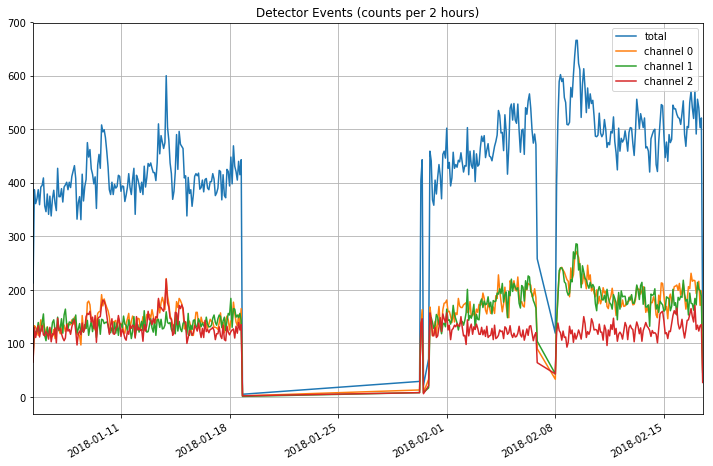

In [262]:
datacombined.plot(title="Detector Events (counts per "+binsizetext+")", grid=True, figsize=(12,8))